# Predicción de TEA infantil (Trastorno del Espectro Autista)

## Entrega 2 - Análisis Exploratorio del Dataset
**Alumno:** Ana María Ramos Orcko  
**Materia:** Aprendizaje Automático  
**Fecha:** 01/06/2025


## 1. Objetivo

El objetivo de este trabajo es construir un modelo de aprendizaje automático que permita predecir si un niño o niña presenta signos compatibles con el Trastorno del Espectro Autista (TEA), a partir de respuestas a un cuestionario de tamizaje y datos sociodemográficos.

Para ello, en esta notebook se presenta la descripción del dataset utilizado, su origen, estructura y primeras transformaciones aplicadas.


## 2. Origen del Dataset
El dataset contiene información de un test de screening para detectar señales tempranas de Trastorno del Espectro Autista (TEA) en niños. Fue recopilado por Fayez Thabtah y está disponible públicamente en el repositorio de aprendizaje automático de la UCI.
- **Nombre del dataset:** *Autistic Spectrum Disorder Screening Data for Children*
- **Fuente oficial:** [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/419/autistic+spectrum+disorder+screening+data+for+children)
- **Cita recomendada**:  
Thabtah, F. (2017). *Autistic Spectrum Disorder Screening Data for Children* [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5659W
- **Nombre de archivo original**: `Autism-Child-Data.arff` fue descargado desde el portal oficial.
- **Fecha de creación**: 2017
- **Métodos de recopilación de datos**: Cuestionario de screening para TEA
- **Formato original del dataset:** `.arff`
- **Fecha de descarga del archivo**: 25/05/2025
- **Ubicación en este proyecto:**  Se encuentra guardado en el repositorio local en la carpeta `data/raw/Autism-Child-Data.arff`
- **Método de carga:** Usamos la librería `scipy.io.arff` para convertir el archivo en un DataFrame de `pandas`. Para esta notebook se trabajó con el archivo `.arff` descargado localmente.


## 3. Carga de datos y primeras visualizaciones

In [2]:
# Importar librerías necesarias
import pandas as pd
from scipy.io import arff #para cargar conjuntos de datos en formato ARFF
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Cargar el archivo .arff con la ruta desde HOME
data, meta = arff.loadarff("prediccion_tea/data/raw/Autism-Child-Data.arff")

# Convertir a DataFrame
df = pd.DataFrame(data)

# Mostrar las primeras filas
print(df.head())

  A1_Score A2_Score A3_Score A4_Score A5_Score A6_Score A7_Score A8_Score  \
0     b'1'     b'1'     b'0'     b'0'     b'1'     b'1'     b'0'     b'1'   
1     b'1'     b'1'     b'0'     b'0'     b'1'     b'1'     b'0'     b'1'   
2     b'1'     b'1'     b'0'     b'0'     b'0'     b'1'     b'1'     b'1'   
3     b'0'     b'1'     b'0'     b'0'     b'1'     b'1'     b'0'     b'0'   
4     b'1'     b'1'     b'1'     b'1'     b'1'     b'1'     b'1'     b'1'   

  A9_Score A10_Score  ...  gender           ethnicity jundice austim  \
0     b'0'      b'0'  ...    b'm'           b'Others'   b'no'  b'no'   
1     b'0'      b'0'  ...    b'm'  b'Middle Eastern '   b'no'  b'no'   
2     b'0'      b'0'  ...    b'm'                b'?'   b'no'  b'no'   
3     b'0'      b'1'  ...    b'f'                b'?'  b'yes'  b'no'   
4     b'1'      b'1'  ...    b'm'           b'Others'  b'yes'  b'no'   

      contry_of_res used_app_before result       age_desc   relation Class/ASD  
0         b'Jordan'    

In [6]:
# Hay columnas con strings en formato bytes (b''), convertirlas a strings normales
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].str.decode('utf-8')

In [8]:
# Verificar la estructura del dataset
print("Número de filas y columnas:", df.shape)

# Mostrar nombres de todas las columnas del DataFrame
print("Nombres de columnas:")
print(df.columns)

print("Tipos de datos:", df.info())
print("Presencia de valores nulos:", df.isnull().sum())

Número de filas y columnas: (292, 21)
Nombres de columnas:
Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         292 non-null    object 
 1   A2_Score         292 non-null    object 
 2   A3_Score         292 non-null    object 
 3   A4_Score         292 non-null    object 
 4   A5_Score         292 non-null    object 
 5   A6_Score         292 non-null    object 
 6   A7_Score         292 non-null    object 
 7   A8_Score         292 non-null    object 
 8   A9_Score         292 non-null    object 
 9   A10_Score        29

In [10]:
# Obtener los valores únicos en cada columna
for columna in df.columns:
    print(f"Valores únicos en la columna '{columna}':")
    print(df[columna].unique())
    print("-" * 50)

Valores únicos en la columna 'A1_Score':
['1' '0']
--------------------------------------------------
Valores únicos en la columna 'A2_Score':
['1' '0']
--------------------------------------------------
Valores únicos en la columna 'A3_Score':
['0' '1']
--------------------------------------------------
Valores únicos en la columna 'A4_Score':
['0' '1']
--------------------------------------------------
Valores únicos en la columna 'A5_Score':
['1' '0']
--------------------------------------------------
Valores únicos en la columna 'A6_Score':
['1' '0']
--------------------------------------------------
Valores únicos en la columna 'A7_Score':
['0' '1']
--------------------------------------------------
Valores únicos en la columna 'A8_Score':
['1' '0']
--------------------------------------------------
Valores únicos en la columna 'A9_Score':
['0' '1']
--------------------------------------------------
Valores únicos en la columna 'A10_Score':
['0' '1']
------------------------------

## 4. Descripción del dataset
Esta salida corresponde a la estructura de un **DataFrame de Pandas** con información sobre 292 registros y 21 columnas. 

### **1. Tamaño del DataFrame**  
- Tiene **292 filas** y **21 columnas**, lo que indica que hay 292 observaciones en el conjunto de datos.

### **2. Tipos de Datos**  
- La mayoría de las columnas (**19 en total**) tienen el tipo `object`, lo que implica que contienen **datos categóricos o texto**.  
- Dos columnas (`age` y `result`) son de tipo `float64`, indicando **valores numéricos continuos**.
|

### **3. Valores Nulos**  
- La columna `age` tiene **4 valores nulos**, lo que podría afectar el análisis si la edad es un factor relevante.  
- Todas las demás columnas tienen **datos completos** (sin valores nulos).

### **4. Errores o Inconsistencias**  
- **Errores tipográficos** en nombres de columnas:  
  - `"jundice"` debería ser **"jaundice"** (ictericia: qué es? https://www.topdoctors.es/diccionario-medico/ictericia/) refiere a la bilirrubina.  
  - `"austim"` probablemente debería ser **"autism"**.  
  - `"contry_of_res"` debería ser **"country_of_residence"**.  
- **Tipo de datos en columnas de puntuación (`A1_Score` a `A10_Score`)**:  
  - Están en formato `object`, pero podrian ser numericas INT O FLOAT ya que contienen valores binarios (`0` y `1`).

### Variables A1_SCores a A10_Score. 
De acuerdo a la referencia señalada en la documentación descargada de la fuente principal antes señalada, las variables A1_SCores a A10_Score corresponden a las preguntas incluidas en el AQ-10-Child, las cuales sirven para evaluar rasgos de comportamiento asociados al TEA en niños. Estas preguntas incluyen aspectos como la capacidad de seguir conversaciones, interpretar emociones en rostros, facilidad para hacer amigos y patrones de atención a detalles. 
El documento mencionado "A1_Score a A10_Score" se encuentra en el siguiente link de acceso web: https://www.autismresearchcentre.com/tests/autism-spectrum-quotient-10-items-aq-10-child/.
A su vez, también encuentra almacenado en el repositorio local dentro de la carpeta data/external/Child_Spanish.docx

Estas variables representan las respuestas (0 = No, 1 = Sí) a preguntas del cuestionario clínico AQ-10:

- `A1_Score`: ¿El niño evita el contacto visual?
- `A2_Score`: ¿Responde cuando lo llaman por su nombre?
- `A3_Score`: ¿Comparte intereses con los demás?
- `A4_Score`: ¿Juega de forma imaginativa?
- `A5_Score`: ¿Señala para mostrar cosas que le interesan?
- `A6_Score`: ¿Responde a expresiones emocionales?
- `A7_Score`: ¿Sigue instrucciones simples?
- `A8_Score`: ¿Muestra afecto hacia otros?
- `A9_Score`: ¿Inicia interacciones sociales?
- `A10_Score`: ¿Utiliza gestos como saludar?

### Otras variables, las salidas: 

- `age`: Edad del niño (numérica).
- `gender`: Género del niño (`m` o `f`).
- `jundice`: Si tuvo ictericia al nacer (`yes` o `no`) (ictericia: qué es? https://www.topdoctors.es/diccionario-medico/ictericia/) refiere a la bilirrubina.
- `austim`: Historial familiar de TEA (`yes` o `no`) refiere a si un familiar cercano ha sido diagnosticado con un trastorno generalizado del desarrollo de autismo.
- `Class/ASD`: Resultado del test de screening (`YES` = resultado positivo, `NO` = resultado negativo), tiene o no TEA.

### Variables que se considera necesario eliminar por no aportar al objetivo predictivo:
- `ethnicity`, `contry_of_res`, `used_app_before`, `result`, `age_desc`, `relation`

| **Atributo**                       | **Tipo**            | **Descripción (traducida)**                                                                             | **¿Qué busca?**                                                                 |
| ---------------------------------- | ------------------- | ------------------------------------------------------------------------------------------------------- | ------------------------------------------------------------------------------- |
| **Edad**                           | Número              | Años                                                                                                    | Determinar si la edad influye en la probabilidad de presentar signos de TEA.    |
| **Género**                         | Cadena (String)     | Masculino o Femenino                                                                                    | Analizar diferencias en la prevalencia de TEA según el género.                  |
| **Etnia**                          | Cadena (String)     | Lista de etnias comunes en formato de texto                                                             | Explorar si hay variaciones culturales o genéticas relacionadas al diagnóstico. |
| **Nacido con ictericia**           | Booleano (sí o no)  | Si el niño nació con ictericia (problema médico al nacer)                                               | Evaluar si esta condición neonatal está correlacionada con TEA.                 |
| **Familiar con PDD**               | Booleano (sí o no)  | Si un familiar cercano ha sido diagnosticado con un trastorno generalizado del desarrollo (PDD)         | Investigar la influencia genética o antecedentes familiares.                    |
| **Quién completa el test**         | Cadena (String)     | Puede ser el padre, la madre, cuidador, personal médico, clínico, etc.                                  | Saber quién proporciona la información del test y su relación con el niño.      |
| **País de residencia**             | Cadena (String)     | Lista de países                                                                                         | Estudiar posibles factores culturales o del entorno.                            |
| **Usó app de detección antes**     | Booleano (sí o no)  | Si el usuario ya había usado una aplicación de cribado o detección del TEA                              | Conocer el grado de exposición previa al cribado del TEA.                       |
| **Tipo de método de detección**    | Entero (0, 1, 2, 3) | Tipo de test utilizado, según la edad: 0=toddler (niño pequeño), 1=child (niño), 2=adolescent, 3=adulto | Saber qué test se usó según la edad del evaluado, ya que los criterios varían.  |
| **Respuesta a Pregunta 1**         | Binario (0, 1)      | Respuesta codificada a la pregunta 1 del cuestionario                                                   | Medir comportamientos relacionados con el TEA.                                  |
| **Respuesta a Pregunta 2**         | Binario (0, 1)      | Respuesta codificada a la pregunta 2                                                                    | Ídem anterior.                                                                  |
| **Respuesta a Pregunta 3**         | Binario (0, 1)      | Respuesta codificada a la pregunta 3                                                                    | Ídem anterior.                                                                  |
| **Respuesta a Pregunta 4**         | Binario (0, 1)      | Respuesta codificada a la pregunta 4                                                                    | Ídem anterior.                                                                  |
| **Respuesta a Pregunta 5**         | Binario (0, 1)      | Respuesta codificada a la pregunta 5                                                                    | Ídem anterior.                                                                  |
| **Respuesta a Pregunta 6**         | Binario (0, 1)      | Respuesta codificada a la pregunta 6                                                                    | Ídem anterior.                                                                  |
| **Respuesta a Pregunta 7**         | Binario (0, 1)      | Respuesta codificada a la pregunta 7                                                                    | Ídem anterior.                                                                  |
| **Respuesta a Pregunta 8**         | Binario (0, 1)      | Respuesta codificada a la pregunta 8                                                                    | Ídem anterior.                                                                  |
| **Respuesta a Pregunta 9**         | Binario (0, 1)      | Respuesta codificada a la pregunta 9                                                                    | Ídem anterior.                                                                  |
| **Respuesta a Pregunta 10**        | Binario (0, 1)      | Respuesta codificada a la pregunta 10                                                                   | Ídem anterior.                                                                  |
| **Puntaje de cribado (screening)** | Entero              | Puntaje final calculado en base a las respuestas. Se computó de forma automática por un algoritmo       | Es el resultado global del test, indica si hay signos consistentes con el TEA.  |


Cantidad de casos por clase:
Class/ASD
NO     151
YES    141
Name: count, dtype: int64

Porcentaje de casos por clase:
Class/ASD
NO     51.712329
YES    48.287671
Name: proportion, dtype: float64


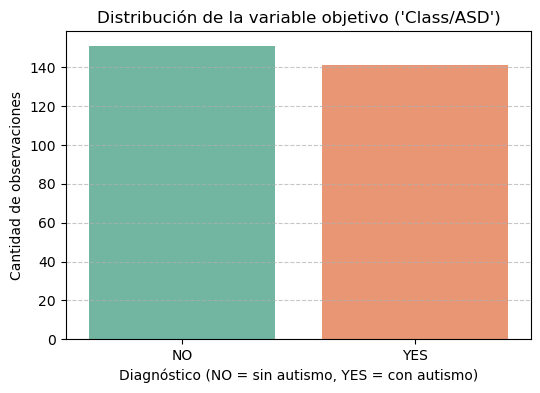

In [16]:
# Cantidad de casos por clase
conteo = df['Class/ASD'].value_counts()
print("Cantidad de casos por clase:")
print(conteo)

# Porcentaje por clase
porcentaje = df['Class/ASD'].value_counts(normalize=True) * 100
print("\nPorcentaje de casos por clase:")
print(porcentaje)

# Visualización de la distribución
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Class/ASD', hue='Class/ASD', palette='Set2', legend=False)
plt.title("Distribución de la variable objetivo ('Class/ASD')")
plt.xlabel("Diagnóstico (NO = sin autismo, YES = con autismo)")
plt.ylabel("Cantidad de observaciones")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### **5. Consideraciones para el Análisis** 
- **Eliminar variables no relevantes**: - `ethnicity`, `contry_of_res`, `used_app_before`, `result`, `age_desc`, `relation`
- **Limpieza**: Corregir nombres de columnas mal escritos.  
- **Conversión de datos**: Asegurar que las columnas `A1_Score` a `A10_Score` sean de tipo `int`, si solo contienen valores `0` y `1`.  
- **Tratamiento de valores nulos**: Decidir cómo manejar los registros con edad faltante (imputación con media/mediana o eliminación).  


In [22]:
# Eliminar variables no relevantes
df = df.drop(['ethnicity', 'contry_of_res', 'used_app_before',
       'result', 'age_desc', 'relation'], axis=1)

Después de eliminar las columnas no relevantes, es importante verificar el tipo de dato de cada columna y convertirlos según sea necesario para que puedan ser utilizados en modelos de predicción.
Columnas categóricas: Las columnas que contienen valores categóricos como '' y 'f' para género, 'no' y 'yes' para jundice, austim, etc., deben ser convertidas a variables categóricas utilizando el método .astype('category')
Columnas numéricas: Las columnas que contienen valores numéricos como la edad, deben ser verificadas para asegurarse de que sean del tipo de dato correcto (int64 o float64).
Columnas de puntuación: Las columnas que contienen puntuaciones como A1_Score, A2_Score, etc., deben ser verificadas para asegurarse de que sean del tipo de dato correcto (int64).

In [25]:
# Convertir columnas categóricas
df['gender'] = df['gender'].astype('category')
df['jundice'] = df['jundice'].astype('category')
df['austim'] = df['austim'].astype('category')
df['Class/ASD'] = df['Class/ASD'].astype('category')

# Verificar tipo de dato de columnas numéricas
print(df['age'].dtype)  # Debe ser int64 o float64

# Verificar tipo de dato de columnas de puntuación
for columna in ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score']:
    print(df[columna].dtype)  # Debe ser int64

# Convertir columnas de puntuación a int64 si es necesario
for columna in ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score']:
    df[columna] = df[columna].astype(int)

float64
object
object
object
object
object
object
object
object
object
object


Después de convertir las columnas, es importante verificar que no haya valores nulos en las columnas que se utilizarán en los modelos de predicción. 

In [28]:
# Verificar la presencia de valores nulos
print("Presencia de valores nulos después de eliminar variables:", df.isnull().sum())

Presencia de valores nulos después de eliminar variables: A1_Score     0
A2_Score     0
A3_Score     0
A4_Score     0
A5_Score     0
A6_Score     0
A7_Score     0
A8_Score     0
A9_Score     0
A10_Score    0
age          4
gender       0
jundice      0
austim       0
Class/ASD    0
dtype: int64


In [30]:
df["age"].describe()

count    288.000000
mean       6.354167
std        2.365456
min        4.000000
25%        4.000000
50%        6.000000
75%        8.000000
max       11.000000
Name: age, dtype: float64

In [32]:
# Reemplazar valores faltantes de age con la moda
df['age'] = df['age'].fillna(df['age'].mode()[0])

In [34]:
# Verificar que los valores faltantes hayan sido reemplazados correctamente
print("Presencia de valores nulos después de reemplazar valores faltantes:", df['age'].isnull().sum())

Presencia de valores nulos después de reemplazar valores faltantes: 0


In [36]:
# Verificar la estadística de la columna age después de reemplazar los valores faltantes
print("Estadísticas de la columna age después de reemplazar valores faltantes:")
print(df['age'].describe())

Estadísticas de la columna age después de reemplazar valores faltantes:
count    292.000000
mean       6.321918
std        2.365081
min        4.000000
25%        4.000000
50%        6.000000
75%        8.000000
max       11.000000
Name: age, dtype: float64


In [38]:
# Verificar la estructura de los datos
print(df.head())
print(df.info())

   A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0         1         1         0         0         1         1         0   
1         1         1         0         0         1         1         0   
2         1         1         0         0         0         1         1   
3         0         1         0         0         1         1         0   
4         1         1         1         1         1         1         1   

   A8_Score  A9_Score  A10_Score  age gender jundice austim Class/ASD  
0         1         0          0  6.0      m      no     no        NO  
1         1         0          0  6.0      m      no     no        NO  
2         1         0          0  6.0      m      no     no        NO  
3         0         0          1  5.0      f     yes     no        NO  
4         1         1          1  5.0      m     yes     no       YES  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 15 columns):
 #   Column 

Habiendo verificado la estructura de los datos, podemos ver que:

* El conjunto de datos tiene 292 filas y 15 columnas.
* Las columnas son de tipo entero (`int32`) para las variables `A1_Score` a `A10_Score`, y de tipo flotante (`float64`) para la variable `age`.
* Las columnas `gender`, `jundice`, `austim` y `Class/ASD` son de tipo categoría (`category`).
* No hay valores faltantes en el conjunto de datos.

La estructura de los datos es la siguiente:

* `A1_Score` a `A10_Score`: variables que representan las respuestas a una serie de preguntas o pruebas, con valores de 0 o 1.
* `age`: variable que representa la edad del niño, con valores flotantes.
* `gender`: variable que representa el género del niño, con valores categorizados (m o f).
* `jundice`: variable que representa si el niño tiene ictericia, con valores categorizados (yes o no).
* `austim`: variable que representa si el niño tiene autismo, con valores categorizados (yes o no).
* `Class/ASD`: variable que representa la clase o diagnóstico del niño, con valores categorizados (NO o YES).

Ahora que hemos verificado la estructura de los datos, podemos proceder a realizar un análisis exploratorio de los datos para entender mejor la distribución de las variables y las relaciones entre ellas. ¿Quieres continuar con el análisis exploratorio?

Las columnas `gender`, `jundice`, `austim` y `Class/ASD` son de tipo categoría (contienen valores no numéricos) y dado que la mayoría de los algoritmos de modelado requieren que las variables sean numéricas, habra q convertirlas a un formato numérico.
Se podría asignar el valor 0 a la categoría "NO" y el valor 1 a la categoría "YES".


In [41]:
import pandas as pd

# One-hot encoding para las columnas gender, jundice y austim
df = pd.get_dummies(df, columns=['gender', 'jundice', 'austim'])

# Label encoding para la columna Class/ASD
df['Class/ASD'] = df['Class/ASD'].map({'NO': 0, 'YES': 1})

In [43]:
print(df.head())
print(df.info())

   A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0         1         1         0         0         1         1         0   
1         1         1         0         0         1         1         0   
2         1         1         0         0         0         1         1   
3         0         1         0         0         1         1         0   
4         1         1         1         1         1         1         1   

   A8_Score  A9_Score  A10_Score  age Class/ASD  gender_f  gender_m  \
0         1         0          0  6.0         0     False      True   
1         1         0          0  6.0         0     False      True   
2         1         0          0  6.0         0     False      True   
3         0         0          1  5.0         0      True     False   
4         1         1          1  5.0         1     False      True   

   jundice_no  jundice_yes  austim_no  austim_yes  
0        True        False       True       False  
1        True     

✅ 6. Descripción de variables 
Después de la limpieza y transformación, nuestro conjunto de datos tiene 292 filas y 18 columnas. Las variables incluyen respuestas a preguntas o pruebas (A1_Score a A10_Score), edad (age), género (gender_f y gender_m), ictericia (jundice_no y jundice_yes) y autismo (austim_no y austim_yes). La variable objetivo es Class/ASD, que indica si el niño tiene autismo o no. Los datos han sido transformados para que tengan un formato adecuado para el análisis y el modelado.

## 5. Preguntas de investigación

- ¿Existe relación entre la edad y la probabilidad de diagnóstico de TEA?
- ¿Las respuestas al cuestionario (A1–A10) predicen efectivamente el diagnóstico?
- ¿El género o antecedentes como ictericia al nacer influyen en el diagnóstico?
- ¿Cuáles son las variables más influyentes en la predicción de posibles casos de TEA en el dataset seleccionado?

## Hipótesis

- H1: Existen ciertas variables sociodemográficas y de comportamiento (como género, edad, respuestas del cuestionario, etc.) que tienen una fuerte correlación con la variable objetivo.
- H2: No hay diferencia significativa entre género y diagnóstico.
- H3: El antecedente de ictericia está asociado a mayor riesgo de TEA.


✅ 8. Guardar el dataset limpio 

In [59]:
# Guardar como CSV para uso posterior
# Guardar el DataFrame limpio como CSV
df.to_csv("prediccion_tea/data/processed/autismo_niños_limpio.csv", index=False)
print("Archivo guardado correctamente.")



Archivo guardado correctamente.
